In [1]:
import csv
import pandas as pd

In [2]:
#para todos retornos de execução de códigos sejam apresentados
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Definição das colunas de acordo com o leiaute fornecido pela B3

In [3]:
# nomes das colunas
nm_colunas = [
    'TIPREG',
    'DTPREG',
    'CODBDI',
    'CODNEG',
    'TPMERC',
    'NOMRES',
    'ESPECI',
    'PRAZOT',
    'MODREF',
    'PREABE',
    'PREMAX',
    'PREMIN',
    'PREMED',
    'PREULT',
    'PREOFC',
    'PREOFV',
    'TOTNEG',
    'QUATOT',
    'VOLTOT',
    'PREEXE',
    'INDOPC',
    'DATVEN',
    'FATCOT',
    'PTOEXE',
    'CODISI',
    'DISMES'    
]

#tamanho das colunas
tam_colunas = [
    2,8,2,12,3,12,10,3,4,11,11,11,11,11,11,11,5,18,16,11,1,8,7,7,12,3    
]

len(tam_colunas)
len(nm_colunas)


26

26

# Carregando os arquivos da B3

In [13]:
import glob as gl

#df = pd.read_fwf('../../data/demo.txt',widths=tam_colunas, names=nm_colunas, skiprows=1, skipfooter=1)
#df = pd.read_fwf('..\\..\\data\\2020.txt',widths=tam_colunas, names=nm_colunas, skiprows=1, skipfooter=1)
#df = pd.read_fwf('..\\..\\data\\2020.txt',widths=tam_colunas, names=nm_colunas, skiprows=1, skipfooter=1)

lista_arq = gl.glob('..\\..\\data\\20*.txt')
lista_arq

df = pd.concat([pd.read_fwf(f,widths=tam_colunas, names=nm_colunas, skiprows=1, skipfooter=1) for f in lista_arq])

['..\\..\\data\\2015.TXT',
 '..\\..\\data\\2016.TXT',
 '..\\..\\data\\2017.TXT',
 '..\\..\\data\\2018.TXT',
 '..\\..\\data\\2019.TXT',
 '..\\..\\data\\2020.TXT',
 '..\\..\\data\\2021.TXT']

# Carregando os indicadores econômicos

In [5]:
df_ind = pd.read_excel('..\\..\\data\\dados_economicos_ipeadata.xlsx')
df_ind

,Data,ibovespa,dolar_venda_media,dolar_venda_final,cdi,ipca,igpm,ipca_15,pib_milhoes
0,2014.06,3.76,2.235470,2.2025,0.82,0.40,-0.74,0.47,458516.5
1,2014.07,5.00,2.224648,2.2674,0.94,0.01,-0.61,0.17,481994.0
2,2014.08,9.78,2.265648,2.2396,0.86,0.25,-0.27,0.14,477052.9
3,2014.09,-11.70,2.332868,2.4510,0.90,0.57,0.20,0.39,476520.6
4,2014.10,0.95,2.448261,2.4442,0.94,0.42,0.28,0.48,493304.7
...,...,...,...,...,...,...,...,...,...
100,2022.10,5.74,5.250300,5.2570,1.02,0.59,-0.97,0.16,826638.8
101,2022.11,-3.06,5.274650,5.2941,1.02,0.41,-0.56,0.53,837324.0
102,2022.12,0.50,5.242432,5.2177,1.12,0.62,0.45,0.52,840892.5
103,2023.01,NaN,5.200682,5.0993,1.12,0.53,0.21,0.55,NaN


# identificando outros possiveis ativos para análise

In [31]:
#escolhendo outros ativos para estudo
am=df.query("NOMRES.str.contains('BRADESCO')")
am['CODNEG'].unique()
am=am.groupby(['CODNEG','ESPECI'])
am.CODNEG.nunique()



array(['BBDC3', 'BBDC3F', 'BBDC3T', 'BBDC4', 'BBDC4F', 'BBDC4T', 'BBDC4S',
       'BBDC1', 'BBDC1F', 'BBDC2', 'BBDC2F'], dtype=object)

CODNEG  ESPECI    
BBDC1   DIR ORD N1    1
BBDC1F  DIR ORD N1    1
BBDC2   DIR PRE N1    1
BBDC2F  DIR PRE N1    1
BBDC3   ON      N1    1
        ON  EB  N1    1
        ON  ED  N1    1
        ON  EDJ N1    1
        ON  EJ  N1    1
        ON  EJB N1    1
        ON  EJS N1    1
        ON  ES  N1    1
BBDC3F  ON      N1    1
        ON  EB  N1    1
        ON  ED  N1    1
        ON  EDJ N1    1
        ON  EJ  N1    1
        ON  EJB N1    1
        ON  EJS N1    1
        ON  ES  N1    1
BBDC3T  ON      N1    1
        ON  EB  N1    1
        ON  ED  N1    1
        ON  EDJ N1    1
        ON  EJ  N1    1
        ON  EJB N1    1
        ON  EJS N1    1
BBDC4   PN      N1    1
        PN  EB  N1    1
        PN  ED  N1    1
        PN  EDJ N1    1
        PN  EJ  N1    1
        PN  EJB N1    1
        PN  EJS N1    1
        PN  ES  N1    1
BBDC4F  PN      N1    1
        PN  EB  N1    1
        PN  ED  N1    1
        PN  EDJ N1    1
        PN  EJ  N1    1
        PN  EJB N1   

In [7]:
am.groups

{('AMZO34', 'DRN'): [51, 1471, 3011, 4671, 6350, 7958, 9535, 11125, 12730, 14429, 16125, 19520, 21071, 22635, 24156, 27003, 30044, 31608, 33241, 34857, 36638, 40009, 41661, 43552, 45058, 46654, 48243, 49933, 51512, 53048, 54569, 56033, 62139, 63604, 68438, 71836, 73659, 75488, 77195, 79087, 81085, 82753, 84554, 86078, 89233, 98749, 100462, 102158, 103826, 107236, 108874, 112177, 119358, 122848, 124458, 126189, 127862, 129435, 132490, 140603, 145580, 147259, 149082, 152615, 158810, 163603, 165181, 172956, 174527, 177770, 181389, 185972, 188717, 190158, 191631, 193199, 196153, 199275, 202219, 203864, 205622, 208611, 210242, 214965, 216669, 218637, 220236, 221897, 223600, 225379, 226997, 228636, 231900, 234965, 236518, 238082, 239600, 241296, 242879, 244565, ...], ('AMZO34', 'DRN EB'): [237782, 237783, 247357, 247358, 247359, 247360, 247361, 247362], ('AMZO34F', 'DRN'): [14430, 19521, 24157, 31609, 41662, 43553, 48244, 54570, 86079, 108875, 124459, 132491, 158811, 210243, 216670, 220237, 

# Verificando a existência de valores "NaN" que possam prejudicar a análise

In [8]:
#df[df.isna().any(axis=1)] -> para selecionar as linhas contendo valores NaN  
df.isna().any() 

#somente PRAZOTOT possui NaN, não havendo necessidade de nenhum tipo de tratamento. Essa variável somente faz sentido para 
#mercado a termo, cujas observações não serão utilizadas neste modelo

TIPREG    False
DTPREG    False
CODBDI    False
CODNEG    False
TPMERC    False
NOMRES    False
ESPECI    False
PRAZOT     True
MODREF    False
PREABE    False
PREMAX    False
PREMIN    False
PREMED    False
PREULT    False
PREOFC    False
PREOFV    False
TOTNEG    False
QUATOT    False
VOLTOT    False
PREEXE    False
INDOPC    False
DATVEN    False
FATCOT    False
PTOEXE    False
CODISI    False
DISMES    False
dtype: bool

# Filtros de ativos

In [11]:
# o campo CODBDI indica o código dos papéis na emissão do boletim diário de informações
# apesar de iteressar somente o CODBDI=2 ou 96 (LOTE PADRAO OU FRACIONARIO), uma análise de frequência nos indica que o arquivo possui também grande volume
# de negociação de "opções"
df['CODBDI'].unique()
df.groupby('CODBDI').count()




array([ 2, 96], dtype=int64)

,TIPREG,DTPREG,CODNEG,TPMERC,NOMRES,ESPECI,PRAZOT,MODREF,PREABE,PREMAX,...,TOTNEG,QUATOT,VOLTOT,PREEXE,INDOPC,DATVEN,FATCOT,PTOEXE,CODISI,DISMES
CODBDI,,,,,,,,,,,,,,,,,,,,,
2,505605,505605,505605,505605,505605,505605,0,505605,505605,505605,...,505605,505605,505605,505605,505605,505605,505605,505605,505605,505605
96,497595,497595,497595,497595,497595,497595,0,497595,497595,497595,...,497595,497595,497595,497595,497595,497595,497595,497595,497595,497595


In [10]:
# filtros
# Critério 1 - somente papéis negociados em R$

df = df.query("MODREF=='R$'")

# Critério 2 - somente ACÕES ORDINÁRIAS e PREFERENCIAIS
# este critério possui dois objetivos:
# - selecionar somente os tipos de ativos mais negociados pelo investidor comum
# - reduzir o número de registros a ser trabalhado
df1 = df[df.ESPECI.str.contains('ON')]
df2 = df[df.ESPECI.str.contains('PN')]

df = pd.concat( [df1,df2])

# Critério 3 - somente LOTE PADRÃO e FRACIONÁRIO
# para este modelo, não temos interesse em outros tipos de ativo, como por exemplo recuperação judicial, opções ou leilões.
df = df.query("CODBDI in (2,96)")

# com os filtros acima aplicados, sobraram somente observações TPMERC(TIPO DE MERCADO) = 10 e 20. Ou seja, "Mercado a Vista" e "Fracionário"
df['TPMERC'].unique()
df['ESPECI'].unique()
df.count()


array([10, 20], dtype=int64)

array(['ON  EJ', 'ON      NM', 'ON', 'ON      N1', 'ON  EJ  NM',
       'ON  EJ  N1', 'ON      MA', 'ON  EDJ NM', 'ON  ES  NM', 'ON  ED',
       'ON *EC', 'ON      N2', 'ON  ED  N1', 'ON  EJ  N2', 'ON  ES  MA',
       'ON  EG  N1', 'ON *', 'ON  EDJ', 'ON      MB', 'ON  EJ  MB',
       'ON  ES', 'ON  EG', 'ON  EG  N2', 'ON  REC NM', 'ON  EJG',
       'ON  EDJ N1', 'ON  EX  N1', 'ON  ED  NM', 'ON  ED  N2',
       'ON  EB  N1', 'ON *ES', 'ON  EJB NM', 'ON  EJB N1', 'ON  EX',
       'ON  REC N1', 'ON  EB  NM', 'ON  ED  MB', 'ON  ER  NM', 'ON  EDB',
       'ON *REC', 'ON  EDS', 'ON  EDB NM', 'ON  ES  N2', 'ON *ED',
       'ON  EDJ MA', 'ON  EDS NM', 'ON  EG  NM', 'ON  EDB N1',
       'ON  EDR NM', 'ON  EG  MA', 'ON  EJ  MA', 'ON  ES  N1', 'ON *EJ',
       'ON  EJS N1', 'ON  EBG NM', 'ON   ED NM', 'ON  EC', 'ON  EB',
       'ON  ERJ', 'ON  EDR', 'ON  EDG', 'ON  EGS NM', 'ON  EJS NM',
       'ON  REC N2', 'ON <', 'ON  EJS N2', 'ON  ATZ', 'ON  ER',
       'ON  ERJ NM', 'ON  EC  NM', 'ON  EDJ N

TIPREG    1003200
DTPREG    1003200
CODBDI    1003200
CODNEG    1003200
TPMERC    1003200
NOMRES    1003200
ESPECI    1003200
PRAZOT          0
MODREF    1003200
PREABE    1003200
PREMAX    1003200
PREMIN    1003200
PREMED    1003200
PREULT    1003200
PREOFC    1003200
PREOFV    1003200
TOTNEG    1003200
QUATOT    1003200
VOLTOT    1003200
PREEXE    1003200
INDOPC    1003200
DATVEN    1003200
FATCOT    1003200
PTOEXE    1003200
CODISI    1003200
DISMES    1003200
dtype: int64

# Escolhendo os ativos específicos para estudo
# O treinamento do modelo será feito com os dados a PETROBRAS


In [40]:
#PETROBRAS
df_pet = df.query("CODNEG=='PETR4'")
df_pet = df_pet.sort_values(['DTPREG','CODNEG'])
df_pet = df_pet.reset_index()
df_pet['ANOPREG']=df_pet['DTPREG'].apply(str).str[:4]
df_pet.groupby('ANOPREG').count()
df_pet
df_pet.to_csv('..\\..\\data\\PETR4.csv')
teste=pd.read_csv('..\\..\\data\\PETR4.csv')

#VIVO
df_viv = df.query("CODNEG=='VIVT4'")
df_viv = df_viv.sort_values(['DTPREG','CODNEG'])
df_viv = df_viv.reset_index()
df_viv['ANOPREG']=df_viv['DTPREG'].apply(str).str[:4]
df_viv.groupby('ANOPREG').count()
df_viv
df_viv.to_csv('..\\..\\data\\VIVT4.csv')
teste=pd.read_csv('..\\..\\data\\VIVT4.csv')


#BRADESCO
 
df_bra = df.query("CODNEG=='BBDC4'")
df_bra = df_bra.sort_values(['DTPREG','CODNEG'])
df_bra = df_bra.reset_index()
df_bra['ANOPREG']=df_amz['DTPREG'].apply(str).str[:4]
df_amz.groupby('ANOPREG').count()
df_bra
df_bra.to_csv('..\\..\\data\\BBDC4.csv')
teste=pd.read_csv('..\\..\\data\\BBDC4.csv')






,index,TIPREG,DTPREG,CODBDI,CODNEG,TPMERC,NOMRES,ESPECI,PRAZOT,MODREF,...,TOTNEG,QUATOT,VOLTOT,PREEXE,INDOPC,DATVEN,FATCOT,PTOEXE,CODISI,DISMES
ANOPREG,,,,,,,,,,,,,,,,,,,,,
2015,246,246,246,246,246,246,246,246,0,246,...,246,246,246,246,246,246,246,246,246,246
2016,249,249,249,249,249,249,249,249,0,249,...,249,249,249,249,249,249,249,249,249,249
2017,246,246,246,246,246,246,246,246,0,246,...,246,246,246,246,246,246,246,246,246,246
2018,245,245,245,245,245,245,245,245,0,245,...,245,245,245,245,245,245,245,245,245,245
2019,248,248,248,248,248,248,248,248,0,248,...,248,248,248,248,248,248,248,248,248,248
2020,249,249,249,249,249,249,249,249,0,249,...,249,249,249,249,249,249,249,249,249,249
2021,247,247,247,247,247,247,247,247,0,247,...,247,247,247,247,247,247,247,247,247,247


,index,TIPREG,DTPREG,CODBDI,CODNEG,TPMERC,NOMRES,ESPECI,PRAZOT,MODREF,...,QUATOT,VOLTOT,PREEXE,INDOPC,DATVEN,FATCOT,PTOEXE,CODISI,DISMES,ANOPREG
0,905,1,20150102,2,PETR4,10,PETROBRAS,PN,NaN,R$,...,940397380000,4883720000,467547,9,25000000,0,9999,123100000010,0,2015
1,2406,1,20150105,2,PETR4,10,PETROBRAS,PN,NaN,R$,...,861909810000,7707730000,674783,8,84000000,0,9999,123100000010,0,2015
2,3976,1,20150106,2,PETR4,10,PETROBRAS,PN,NaN,R$,...,833772830000,8402340000,706839,8,84000000,0,9999,123100000010,0,2015
3,5700,1,20150107,2,PETR4,10,PETROBRAS,PN,NaN,R$,...,868853080000,8553100000,733268,9,24000000,0,9999,123100000010,0,2015
4,7292,1,20150108,2,PETR4,10,PETROBRAS,PN,NaN,R$,...,918866960000,8273570000,754338,6,35000000,0,9999,123100000010,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,996357,1,20211223,2,PETR4,10,PETROBRAS,PN N2,NaN,R$,...,2833433810000,2871360000,812335,5,62000000,0,9999,123100000010,0,2021
1726,996358,1,20211227,2,PETR4,10,PETROBRAS,PN N2,NaN,R$,...,2876460600000,4422790000,1265090,3,1000000,0,9999,123100000010,0,2021
1727,996359,1,20211228,2,PETR4,10,PETROBRAS,PN N2,NaN,R$,...,2878431420000,3068810000,886001,6,99000000,0,9999,123100000010,0,2021
1728,996360,1,20211229,2,PETR4,10,PETROBRAS,PN N2,NaN,R$,...,2854610880000,3550840000,1015407,3,91000000,0,9999,123100000010,0,2021


,index,TIPREG,DTPREG,CODBDI,CODNEG,TPMERC,NOMRES,ESPECI,PRAZOT,MODREF,...,TOTNEG,QUATOT,VOLTOT,PREEXE,INDOPC,DATVEN,FATCOT,PTOEXE,CODISI,DISMES
ANOPREG,,,,,,,,,,,,,,,,,,,,,
2015,246,246,246,246,246,246,246,246,0,246,...,246,246,246,246,246,246,246,246,246,246
2016,249,249,249,249,249,249,249,249,0,249,...,249,249,249,249,249,249,249,249,249,249
2017,246,246,246,246,246,246,246,246,0,246,...,246,246,246,246,246,246,246,246,246,246
2018,245,245,245,245,245,245,245,245,0,245,...,245,245,245,245,245,245,245,245,245,245
2019,248,248,248,248,248,248,248,248,0,248,...,248,248,248,248,248,248,248,248,248,248
2020,223,223,223,223,223,223,223,223,0,223,...,223,223,223,223,223,223,223,223,223,223


,index,TIPREG,DTPREG,CODBDI,CODNEG,TPMERC,NOMRES,ESPECI,PRAZOT,MODREF,...,QUATOT,VOLTOT,PREEXE,INDOPC,DATVEN,FATCOT,PTOEXE,CODISI,DISMES,ANOPREG
0,1377,1,20150102,2,VIVT4,10,TELEF BRASIL,PN EJ,NaN,R$,...,4626051370000,93480000,43307,9,65000000,0,9999,123100000010,0,2015
1,2929,1,20150105,2,VIVT4,10,TELEF BRASIL,PN EJ,NaN,R$,...,4608061610000,99700000,45614,8,12000000,0,9999,123100000010,0,2015
2,4565,1,20150106,2,VIVT4,10,TELEF BRASIL,PN EJ,NaN,R$,...,4567042990000,82240000,37485,7,27000000,0,9999,123100000010,0,2015
3,6254,1,20150107,2,VIVT4,10,TELEF BRASIL,PN EJ,NaN,R$,...,4675036170000,52490000,24415,2,26000000,0,9999,123100000010,0,2015
4,7866,1,20150108,2,VIVT4,10,TELEF BRASIL,PN EJ,NaN,R$,...,4700019270000,36010000,16878,5,85000000,0,9999,123100000010,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,256080,1,20201116,2,VIVT4,10,TELEF BRASIL,PN,NaN,R$,...,4561142150000,259410000,118073,6,22000000,0,9999,123100000010,0,2020
1453,256081,1,20201117,2,VIVT4,10,TELEF BRASIL,PN,NaN,R$,...,4673161030000,260340000,120508,2,77000000,0,9999,123100000010,0,2020
1454,256082,1,20201118,2,VIVT4,10,TELEF BRASIL,PN,NaN,R$,...,4670114910000,218500000,102566,0,49000000,0,9999,123100000010,0,2020
1455,265642,1,20201119,2,VIVT4,10,TELEF BRASIL,PN,NaN,R$,...,4640107440000,175440000,82049,5,51000000,0,9999,123100000010,0,2020


,index,TIPREG,DTPREG,CODBDI,CODNEG,TPMERC,NOMRES,ESPECI,PRAZOT,MODREF,...,TOTNEG,QUATOT,VOLTOT,PREEXE,INDOPC,DATVEN,FATCOT,PTOEXE,CODISI,DISMES
ANOPREG,,,,,,,,,,,,,,,,,,,,,
2015,176,176,176,176,176,176,176,176,0,176,...,176,176,176,176,176,176,176,176,176,176
2016,167,167,167,167,167,167,167,167,0,167,...,167,167,167,167,167,167,167,167,167,167
2017,141,141,141,141,141,141,141,141,0,141,...,141,141,141,141,141,141,141,141,141,141
2018,202,202,202,202,202,202,202,202,0,202,...,202,202,202,202,202,202,202,202,202,202
2019,174,174,174,174,174,174,174,174,0,174,...,174,174,174,174,174,174,174,174,174,174
2020,243,243,243,243,243,243,243,243,0,243,...,243,243,243,243,243,243,243,243,243,243
2021,247,247,247,247,247,247,247,247,0,247,...,247,247,247,247,247,247,247,247,247,247


,index,TIPREG,DTPREG,CODBDI,CODNEG,TPMERC,NOMRES,ESPECI,PRAZOT,MODREF,...,QUATOT,VOLTOT,PREEXE,INDOPC,DATVEN,FATCOT,PTOEXE,CODISI,DISMES,ANOPREG
0,131,1,20150102,2,BBDC4,10,BRADESCO,PN EJ N1,NaN,R$,...,3432172360000,780190000,270353,2,96000000,0,9999,123100000010,0,2015
1,1539,1,20150105,2,BBDC4,10,BRADESCO,PN EJ N1,NaN,R$,...,3435238440000,773160000,263966,6,90000000,0,9999,123100000010,0,2015
2,3080,1,20150106,2,BBDC4,10,BRADESCO,PN EJ N1,NaN,R$,...,3548179660000,996260000,347310,8,46000000,0,9999,123100000010,0,2015
3,4745,1,20150107,2,BBDC4,10,BRADESCO,PN EJ N1,NaN,R$,...,3689298610000,1061700000,390734,7,22000000,0,9999,123100000010,0,2015
4,6411,1,20150108,2,BBDC4,10,BRADESCO,PN EJ N1,NaN,R$,...,3708167340000,582960000,215516,0,23000000,0,9999,123100000010,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,1040486,1,20211223,2,BBDC4,10,BRADESCO,PN EDJ N1,NaN,R$,...,1926381640000,2724290000,525456,6,92000000,0,9999,123100000010,0,NaN
1726,1040487,1,20211227,2,BBDC4,10,BRADESCO,PN EDJ N1,NaN,R$,...,1947330890000,2018910000,391833,1,6000000,0,9999,123100000010,0,NaN
1727,1043545,1,20211228,2,BBDC4,10,BRADESCO,PN EDJ N1,NaN,R$,...,1940292880000,1751620000,340340,6,0,0,9999,123100000010,0,NaN
1728,1043546,1,20211229,2,BBDC4,10,BRADESCO,PN EDJ N1,NaN,R$,...,1931281640000,1368780000,264305,3,62000000,0,9999,123100000010,0,NaN


# A variável PREULT , indica o último valor do ativo no dia e será a variável de trabalho

In [15]:

df_pet['PREULT']=df_pet['PREULT']/100000
valores = df_pet['PREULT']
valores.shape

(1730,)

# Vizualizando os dados

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (18,9))
plt.plot(df_pet['PREULT'])
plt.xticks(range(0,df_pet.shape[0],200), df_pet['DTPREG'].loc[::200], rotation=45)
plt.xlabel('Datas', fontsize=18)
plt.ylabel('Preço Final', fontsize=18)
plt.title("Histórico de Preço", fontsize=30)
plt.show()

# A variável dias_input indica o número de dias que será utilizado como informação de entrada para a predição.

## Dessa forma, para que o modelo possa predizer o valor do ativo em uma determinada data, irá utilizar como "input" os valores do ativo correspondentes aos "dias_input" anteriores.

In [16]:
#número de dias utilizados para predição (input)
dias_input = 15

# Separação entre teste e treino

In [17]:
import numpy as np

tam_treino = int(len(valores) * 0.95)
tam_teste = len(valores) - tam_treino
tam_treino
tam_teste

dados_treino, dados_teste = np.array(valores[0:tam_treino]), np.array(valores[tam_treino - dias_input:])
dados_valid = np.array(valores[tam_treino:])

dados_treino.shape,  dados_valid.shape, dados_teste.shape
dados_teste
dados_teste.shape



1643

87

((1643,), (87,), (102,))

array([26.28, 28.56, 28.31, 28.02, 28.52, 28.57, 28.94, 29.34, 28.7 ,
       27.  , 26.98, 26.5 , 26.41, 27.11, 27.43, 27.62, 27.64, 28.13,
       28.45, 27.53, 26.91, 26.88, 26.33, 26.51, 25.51, 24.82, 25.59,
       26.11, 25.96, 26.18, 25.89, 25.16, 24.25, 25.01, 25.93, 26.59,
       26.84, 27.17, 27.31, 27.28, 27.36, 27.69, 28.38, 29.26, 28.73,
       28.7 , 29.13, 29.58, 29.49, 29.88, 29.63, 29.38, 28.41, 28.41,
       27.45, 26.76, 28.6 , 28.91, 28.8 , 28.88, 27.83, 27.9 , 27.26,
       26.24, 26.03, 26.22, 26.65, 26.62, 26.45, 26.54, 27.16, 26.97,
       26.4 , 26.05, 26.76, 27.5 , 28.07, 29.33, 28.53, 29.4 , 29.29,
       30.09, 27.61, 28.61, 29.01, 29.22, 29.57, 29.15, 29.69, 29.58,
       29.36, 28.98, 29.74, 29.11, 28.04, 28.37, 28.16, 28.29, 28.6 ,
       28.87, 28.59, 28.51])

(102,)

# "plotando" o gráfico com séries de treino e input

In [ ]:
import matplotlib.pyplot as plt

intervalo = 90


plt.figure(figsize = (18,9))
plt.plot(df_pet['PREULT'].loc[0:tam_treino], color = 'blue', label = 'treino')
plt.plot(df_pet['PREULT'].loc[tam_treino:], color = 'red', label = 'teste')
plt.xticks(range(0,len(df_pet),intervalo), df_pet['DTPREG'].loc[::intervalo], rotation=45)
plt.xlabel('Datas', fontsize=18)
plt.ylabel('Preço Final', fontsize=18)
plt.title("Histórico de Preço", fontsize=30)
plt.legend()
plt.show()




# Normalização dos dados


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
dados_treino_z = scaler.fit_transform(np.array(dados_treino).reshape(-1,1))
dados_teste_z = scaler.transform(np.array(dados_teste).reshape(-1,1))
dados_valid_z = scaler.transform(np.array(dados_valid).reshape(-1,1))

dados_treino_z.shape
dados_teste_z.shape
dados_valid_z.shape

dados_teste_z.shape
dados_teste_z


(1643, 1)

(102, 1)

(87, 1)

(102, 1)

array([[0.82241251],
       [0.9072971 ],
       [0.89798958],
       [0.88719285],
       [0.90580789],
       [0.9076694 ],
       [0.92144453],
       [0.93633656],
       [0.91250931],
       [0.84921817],
       [0.84847357],
       [0.83060313],
       [0.82725242],
       [0.85331348],
       [0.8652271 ],
       [0.87230082],
       [0.87304542],
       [0.89128816],
       [0.90320179],
       [0.86895011],
       [0.84586746],
       [0.84475056],
       [0.82427401],
       [0.83097543],
       [0.79374535],
       [0.76805659],
       [0.79672375],
       [0.8160834 ],
       [0.81049888],
       [0.8186895 ],
       [0.80789278],
       [0.78071482],
       [0.74683544],
       [0.77513031],
       [0.80938198],
       [0.83395383],
       [0.84326136],
       [0.85554728],
       [0.86075949],
       [0.85964259],
       [0.862621  ],
       [0.87490692],
       [0.90059568],
       [0.93335815],
       [0.91362621],
       [0.91250931],
       [0.92851824],
       [0.945

# Gerando os dados "input" e "target" necessários para treinar o modelo

In [19]:
#treino
input_treino, target_treino = [], []
for i in range(dias_input, len(dados_treino_z)):
    input_treino.append(dados_treino_z[i-dias_input:i])
    target_treino.append(dados_treino_z[i])


#teste
input_teste = []
for i in range(dias_input,len(dados_teste_z)):
    input_teste.append(dados_teste_z[i-dias_input:i]) 
    
#val
input_valid, target_valid = [], []
for i in range(dias_input, len(dados_valid_z)):
    input_valid.append(dados_valid_z[i-dias_input:i])
    target_valid.append(dados_valid_z[i])

#converter tudo pra matriz numpy
input_treino = np.array(input_treino)
target_treino = np.array(target_treino)
input_teste = np.array(input_teste)
input_valid = np.array(input_valid)
target_valid = np.array(target_valid)


input_treino.shape
target_treino.shape
input_teste.shape
input_valid.shape
target_valid.shape

    

(1628, 15, 1)

(1628, 1)

(87, 15, 1)

(72, 15, 1)

(72, 1)

   # Definição dos hiper parâmetros do modelo   

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import SGD

modelo = Sequential()
modelo.add(LSTM(100, return_sequences=True, input_shape=(dias_input, 1)))
#model.add(Dropout(0.3))
modelo.add(LSTM(100, return_sequences=False, input_shape=(dias_input, 1)))
#model.add(Dropout(0.3))
modelo.add(Dense(1))
modelo.compile(loss='mse', optimizer='adam')

modelo.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


# Realizando o treinamento do modelo

In [21]:
hist_modelo = modelo.fit(input_treino, target_treino, validation_data = (input_valid, target_valid), epochs=3, batch_size=2)



Epoch 1/3
814/814 [==============================] - 20s 18ms/step - loss: 0.0047 - val_loss: 0.0013
Epoch 2/3
814/814 [==============================] - 13s 16ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 3/3
814/814 [==============================] - 13s 16ms/step - loss: 9.5609e-04 - val_loss: 8.4048e-04


# Análise do histórico de treinamento

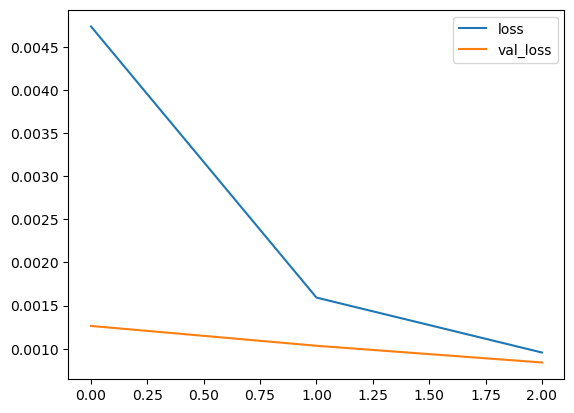

In [22]:
import matplotlib.pyplot as plt

plt.plot(hist_modelo.history["loss"], label='loss')
plt.plot(hist_modelo.history["val_loss"], label='val_loss')
plt.legend()

# Realização da predição dos dados de teste

In [23]:
resultado_z = modelo.predict(input_teste)



resultado_z.shape
input_teste.shape
dados_teste_z.shape
resultado_z

3/3 [==============================] - 1s 13ms/step


(87, 1)

(87, 15, 1)

(102, 1)

array([[0.84565604],
       [0.86466956],
       [0.87545663],
       [0.887162  ],
       [0.8985603 ],
       [0.88744485],
       [0.8628777 ],
       [0.84378433],
       [0.8250323 ],
       [0.8184917 ],
       [0.8024707 ],
       [0.7801848 ],
       [0.7793232 ],
       [0.79487824],
       [0.8074777 ],
       [0.8181679 ],
       [0.8184283 ],
       [0.8024589 ],
       [0.7725307 ],
       [0.7633363 ],
       [0.77970254],
       [0.8092259 ],
       [0.8353611 ],
       [0.85481775],
       [0.8650632 ],
       [0.8661406 ],
       [0.8639723 ],
       [0.86634296],
       [0.8805126 ],
       [0.9074142 ],
       [0.91654074],
       [0.9153137 ],
       [0.9181784 ],
       [0.92829233],
       [0.93399847],
       [0.94268817],
       [0.9433708 ],
       [0.93662107],
       [0.91298664],
       [0.8952036 ],
       [0.87044734],
       [0.8438903 ],
       [0.861749  ],
       [0.8919407 ],
       [0.9123672 ],
       [0.9224647 ],
       [0.90517604],
       [0.887

# Análise dos resultados

In [24]:
resultado = scaler.inverse_transform(resultado_z)
real = scaler.inverse_transform(dados_teste_z)
real = dados_teste[dias_input-1:]


resultado.shape
real.shape
dados_teste.shape
dados_teste_z.shape

(87, 1)

(88,)

(102,)

(102, 1)

<Figure size 1800x900 with 0 Axes>

([<matplotlib.axis.XTick at 0x225033f09d0>,
 [Text(0, 0, '20210825'),
  Text(5, 0, '20210901'),
  Text(10, 0, '20210909'),
  Text(15, 0, '20210916'),
  Text(20, 0, '20210923'),
  Text(25, 0, '20210930'),
  Text(30, 0, '20211007'),
  Text(35, 0, '20211015'),
  Text(40, 0, '20211022'),
  Text(45, 0, '20211029'),
  Text(50, 0, '20211108'),
  Text(55, 0, '20211116'),
  Text(60, 0, '20211123'),
  Text(65, 0, '20211130'),
  Text(70, 0, '20211207'),
  Text(75, 0, '20211214'),
  Text(80, 0, '20211221'),
  Text(85, 0, '20211229')])

Text(0.5, 0, 'Datas')

Text(0, 0.5, 'Preço Final')

Text(0.5, 1.0, 'Projeção de Preço Petrobras')

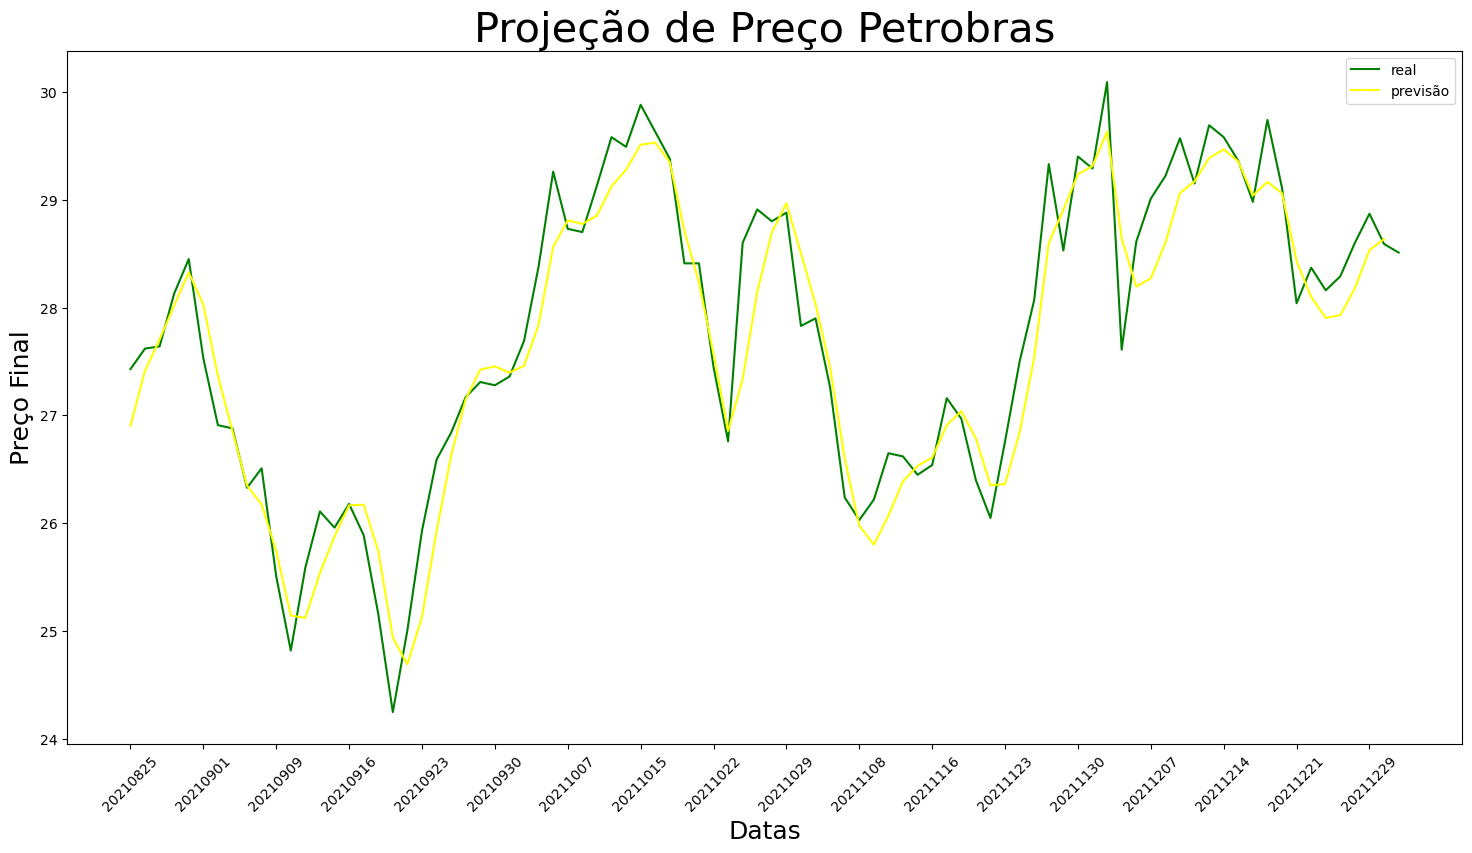

In [25]:



plt.figure(figsize = (18,9))
#plt.plot(dados_teste[:len(dados_teste)-dias_input], color = 'green', label = 'real')
plt.plot(real, color = 'green', label = 'real')
plt.plot(resultado, color = 'yellow', label = 'previsão')
#plt.xticks(range(0, len(dados_teste), 50), df_pet['Date'].iloc[- len(real)::50], rotation=45)
plt.xticks(range(0,len(input_teste),5), df_pet['DTPREG'].iloc[-len(input_teste)::5], rotation=45)
plt.xlabel('Datas', fontsize=18)
plt.ylabel('Preço Final', fontsize=18)
plt.title("Projeção de Preço Petrobras", fontsize=30)
plt.legend()
plt.show()

# gerando as informações para predição das acões do Bradesco

In [46]:
df_bra['PREULT']=df_bra['PREULT']/100000

In [47]:
valores = df_bra['PREULT']
df_bra['PREULT']
valores

0       34.65
1       34.14
2       34.85
3       36.80
4       36.96
        ...  
1725    19.28
1726    19.40
1727    19.43
1728    19.30
1729    19.17
Name: PREULT, Length: 1730, dtype: float64

0       34.65
1       34.14
2       34.85
3       36.80
4       36.96
        ...  
1725    19.28
1726    19.40
1727    19.43
1728    19.30
1729    19.17
Name: PREULT, Length: 1730, dtype: float64

In [48]:
valores = df_bra['PREULT']


dados_teste = np.array(valores)
dados_teste_z = scaler.transform(np.array(dados_teste).reshape(-1,1))

#teste
input_teste = []
for i in range(dias_input,len(dados_teste_z)):
    input_teste.append(dados_teste_z[i-dias_input:i]) 
input_teste = np.array(input_teste)

resultado_z = modelo.predict(input_teste)

resultado = scaler.inverse_transform(resultado_z)
real = scaler.inverse_transform(dados_teste_z)

real = dados_teste[dias_input-1:]
real
resultado




54/54 [==============================] - 1s 14ms/step


array([35.86, 35.29, 35.62, ..., 19.43, 19.3 , 19.17])

array([[34.89277 ],
       [34.988705],
       [35.092335],
       ...,
       [19.427359],
       [19.54007 ],
       [19.578999]], dtype=float32)

<Figure size 1800x900 with 0 Axes>

([<matplotlib.axis.XTick at 0x225c5cc4b20>,
 [Text(0, 0, '20150123'),
  Text(60, 0, '20150423'),
  Text(120, 0, '20150721'),
  Text(180, 0, '20151015'),
  Text(240, 0, '20160115'),
  Text(300, 0, '20160414'),
  Text(360, 0, '20160711'),
  Text(420, 0, '20161004'),
  Text(480, 0, '20170102'),
  Text(540, 0, '20170330'),
  Text(600, 0, '20170628'),
  Text(660, 0, '20170921'),
  Text(720, 0, '20171220'),
  Text(780, 0, '20180322'),
  Text(840, 0, '20180619'),
  Text(900, 0, '20180913'),
  Text(960, 0, '20181212'),
  Text(1020, 0, '20190315'),
  Text(1080, 0, '20190611'),
  Text(1140, 0, '20190905'),
  Text(1200, 0, '20191202'),
  Text(1260, 0, '20200303'),
  Text(1320, 0, '20200529'),
  Text(1380, 0, '20200824'),
  Text(1440, 0, '20201119'),
  Text(1500, 0, '20210222'),
  Text(1560, 0, '20210519'),
  Text(1620, 0, '20210813'),
  Text(1680, 0, '20211110')])

Text(0.5, 0, 'Datas')

Text(0, 0.5, 'Preço Final')

Text(0.5, 1.0, 'Projeção de Preço BRADESCO')

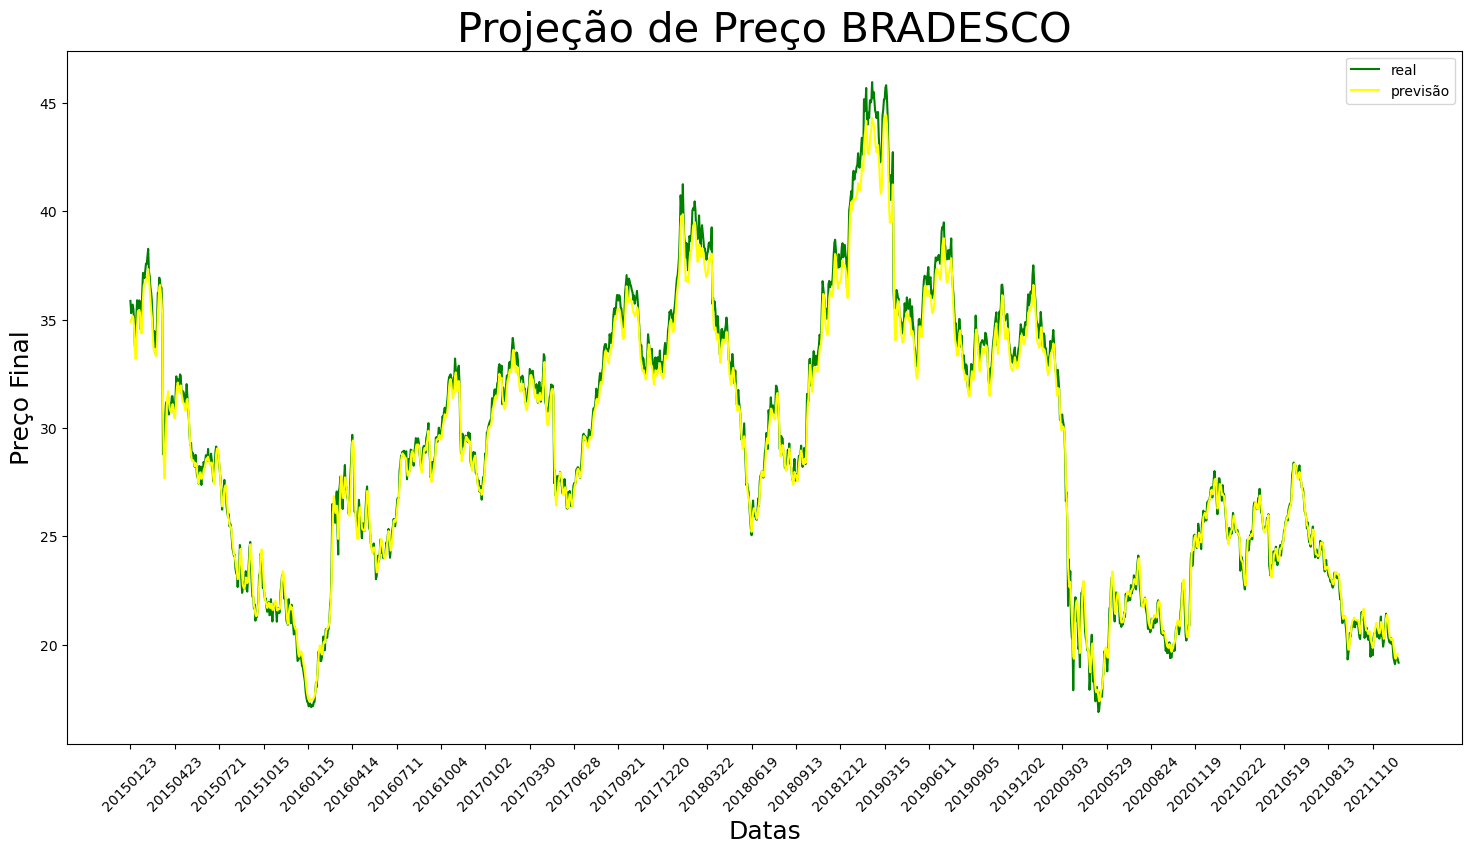

In [49]:
plt.figure(figsize = (18,9))
#plt.plot(dados_teste[:len(dados_teste)-dias_input], color = 'green', label = 'real')
plt.plot(real, color = 'green', label = 'real')
plt.plot(resultado, color = 'yellow', label = 'previsão')
#plt.xticks(range(0, len(dados_teste), 50), df_pet['Date'].iloc[- len(real)::50], rotation=45)
plt.xticks(range(0,len(input_teste),60), df_bra['DTPREG'].iloc[-len(input_teste)::60], rotation=45)
plt.xlabel('Datas', fontsize=18)
plt.ylabel('Preço Final', fontsize=18)
plt.title("Projeção de Preço BRADESCO", fontsize=30)
plt.legend()
plt.show()

# Gerando as informações para o Google

In [50]:
df_viv['PREULT']=df_viv['PREULT']/100000
df_viv

,index,TIPREG,DTPREG,CODBDI,CODNEG,TPMERC,NOMRES,ESPECI,PRAZOT,MODREF,...,QUATOT,VOLTOT,PREEXE,INDOPC,DATVEN,FATCOT,PTOEXE,CODISI,DISMES,ANOPREG
0,1377,1,20150102,2,VIVT4,10,TELEF BRASIL,PN EJ,NaN,R$,...,4626051370000,93480000,43307,9,65000000,0,9999,123100000010,0,2015
1,2929,1,20150105,2,VIVT4,10,TELEF BRASIL,PN EJ,NaN,R$,...,4608061610000,99700000,45614,8,12000000,0,9999,123100000010,0,2015
2,4565,1,20150106,2,VIVT4,10,TELEF BRASIL,PN EJ,NaN,R$,...,4567042990000,82240000,37485,7,27000000,0,9999,123100000010,0,2015
3,6254,1,20150107,2,VIVT4,10,TELEF BRASIL,PN EJ,NaN,R$,...,4675036170000,52490000,24415,2,26000000,0,9999,123100000010,0,2015
4,7866,1,20150108,2,VIVT4,10,TELEF BRASIL,PN EJ,NaN,R$,...,4700019270000,36010000,16878,5,85000000,0,9999,123100000010,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,256080,1,20201116,2,VIVT4,10,TELEF BRASIL,PN,NaN,R$,...,4561142150000,259410000,118073,6,22000000,0,9999,123100000010,0,2020
1453,256081,1,20201117,2,VIVT4,10,TELEF BRASIL,PN,NaN,R$,...,4673161030000,260340000,120508,2,77000000,0,9999,123100000010,0,2020
1454,256082,1,20201118,2,VIVT4,10,TELEF BRASIL,PN,NaN,R$,...,4670114910000,218500000,102566,0,49000000,0,9999,123100000010,0,2020
1455,265642,1,20201119,2,VIVT4,10,TELEF BRASIL,PN,NaN,R$,...,4640107440000,175440000,82049,5,51000000,0,9999,123100000010,0,2020


In [51]:
valores = df_viv['PREULT']


dados_teste = np.array(valores)
dados_teste_z = scaler.transform(np.array(dados_teste).reshape(-1,1))

#teste
input_teste = []
for i in range(dias_input,len(dados_teste_z)):
    input_teste.append(dados_teste_z[i-dias_input:i]) 
input_teste = np.array(input_teste)

resultado_z = modelo.predict(input_teste)

resultado = scaler.inverse_transform(resultado_z)
real = scaler.inverse_transform(dados_teste_z)

real = dados_teste[dias_input-1:]
real
resultado

46/46 [==============================] - 1s 14ms/step


array([51.96, 51.68, 50.82, ..., 46.94, 46.76, 45.65])

array([[50.025135],
       [49.870617],
       [48.990635],
       ...,
       [44.290337],
       [45.157803],
       [45.456818]], dtype=float32)

<Figure size 1800x900 with 0 Axes>

([<matplotlib.axis.XTick at 0x22545839ca0>,
 [Text(0, 0, '20150123'),
  Text(60, 0, '20150423'),
  Text(120, 0, '20150721'),
  Text(180, 0, '20151015'),
  Text(240, 0, '20160115'),
  Text(300, 0, '20160414'),
  Text(360, 0, '20160711'),
  Text(420, 0, '20161004'),
  Text(480, 0, '20170102'),
  Text(540, 0, '20170330'),
  Text(600, 0, '20170628'),
  Text(660, 0, '20170921'),
  Text(720, 0, '20171220'),
  Text(780, 0, '20180322'),
  Text(840, 0, '20180619'),
  Text(900, 0, '20180913'),
  Text(960, 0, '20181212'),
  Text(1020, 0, '20190315'),
  Text(1080, 0, '20190611'),
  Text(1140, 0, '20190905'),
  Text(1200, 0, '20191202'),
  Text(1260, 0, '20200303'),
  Text(1320, 0, '20200529'),
  Text(1380, 0, '20200824'),
  Text(1440, 0, '20201119')])

Text(0.5, 0, 'Datas')

Text(0, 0.5, 'Preço Final')

Text(0.5, 1.0, 'Projeção de Preço Vivo')

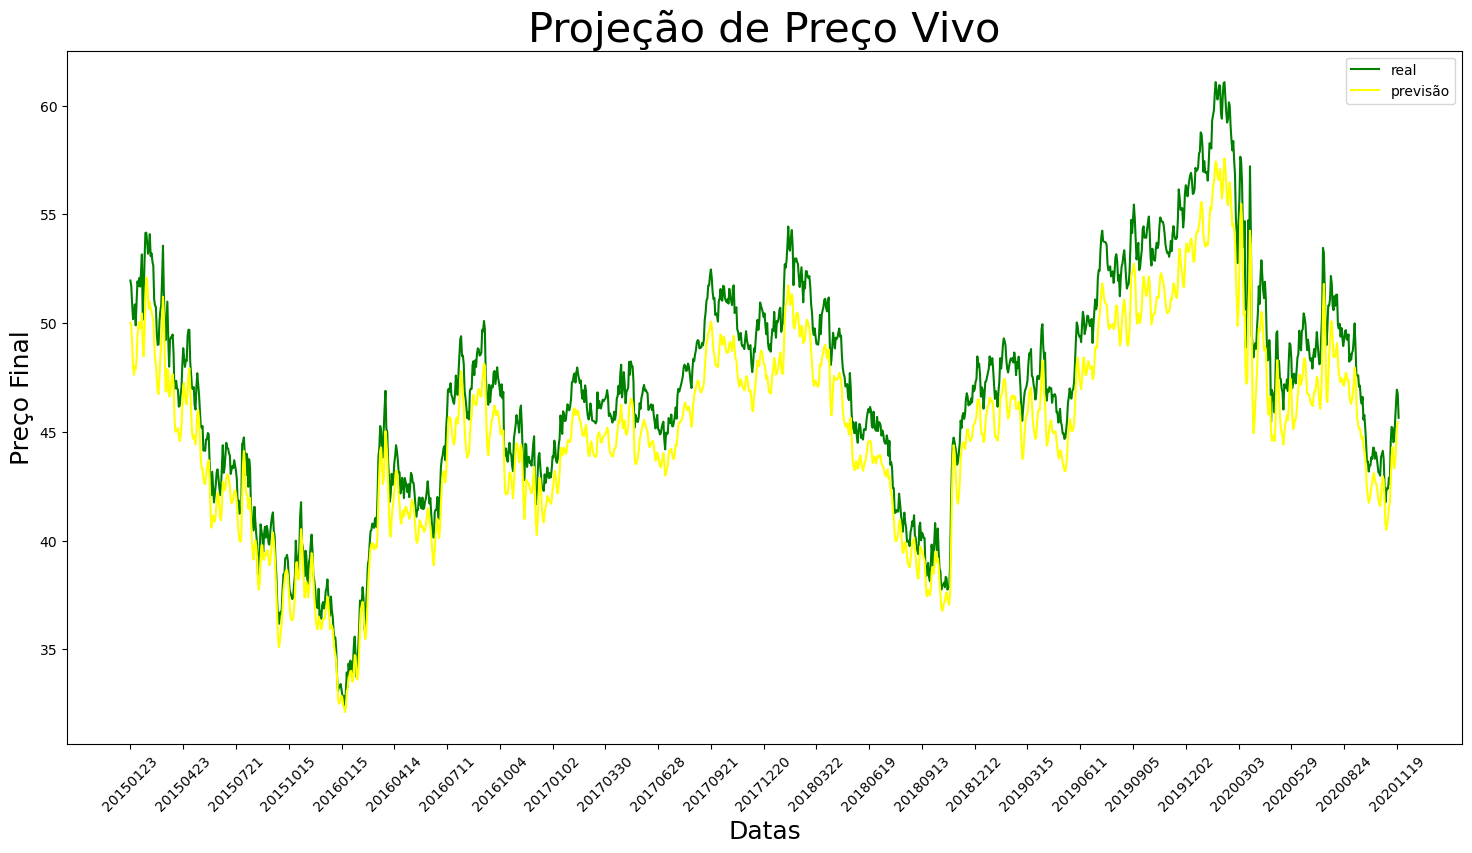

In [53]:
plt.figure(figsize = (18,9))
#plt.plot(dados_teste[:len(dados_teste)-dias_input], color = 'green', label = 'real')
plt.plot(real, color = 'green', label = 'real')
plt.plot(resultado, color = 'yellow', label = 'previsão')
#plt.xticks(range(0, len(dados_teste), 50), df_pet['Date'].iloc[- len(real)::50], rotation=45)
plt.xticks(range(0,len(input_teste),60), df_viv['DTPREG'].iloc[-len(input_teste)::60], rotation=45)
plt.xlabel('Datas', fontsize=18)
plt.ylabel('Preço Final', fontsize=18)
plt.title("Projeção de Preço Vivo", fontsize=30)
plt.legend()
plt.show()

# realizando a predição dia a dia para atualizar os inputs

In [ ]:
input_pred = input_teste[0:1].copy() #pega o primeiro dia do conjunto de teste
predicoes = []
for i in range(len(dados_teste)):
    
    resultado = modelo.predict(input_pred)
    predicoes.append(resultado[0, 0])
    
    #remove primeiro preço da sequência
    temp = np.delete(input_pred[0], 0)

    #insere último preço da sequência
    temp = np.append(temp, resultado)
    
    #recoloca no formato tensorflow
    input_pred[0] = np.reshape(temp, (dias_input, 1))
    
predicoes = scaler.inverse_transform(np.array(predicoes).reshape(-1, 1))

predicoes

In [ ]:
len(dados_teste)

plt.figure(figsize = (18,9))
plt.plot(dados_teste, color = 'green', label = 'real')
plt.plot(predicoes, color = 'red', label = 'previsão')
plt.xticks(range(0, len(dados_teste), 10), df_pet['DTPREG'].iloc[-len(dados_teste)::10], rotation=45)
plt.xlabel('Datas', fontsize=18)
plt.ylabel('Preço Final', fontsize=18)
plt.title("Projeção de Preço", fontsize=30)
plt.legend()
plt.show()